In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Load 'fashion_mnist' data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Scale the values to a range of 0 to 1 of both data sets

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten input data

In [5]:
X_train = train_images.reshape(60000,-1)
X_test = test_images.reshape(10000, -1)

In [6]:
X_train.shape , X_test.shape

((60000, 784), (10000, 784))

# one-hot-encodes labels

In [7]:
ytrain = to_categorical(train_labels)

In [8]:
ytrain.shape

(60000, 10)

# Step 1

In [9]:
K.clear_session()

In [10]:
model = Sequential([
                    Dense(units=25, activation='relu', input_shape=X_train[0].shape),
                    Dense(units=25, activation='relu'),
                    Dense(units=25, activation='relu'),
                    Dense(units=25, activation='relu'),
                    Dense(units=25, activation='relu'),
                    Dense(units=10, activation='softmax')
])

# Step 2

In [11]:
model.compile(
            optimizer='adam',
            loss= 'categorical_crossentropy',
            metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                260       
Total params: 22,485
Trainable params: 22,485
Non-trainable params: 0
____________________________________________________

In [13]:
hist = model.fit(X_train,ytrain, batch_size=500, epochs=100, verbose='auto', validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 3s 12ms/step - loss: 1.3471 - accuracy: 0.4864 - val_loss: 0.7264 - val_accuracy: 0.7393
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 0.6102 - accuracy: 0.7841 - val_loss: 0.5447 - val_accuracy: 0.8126
Epoch 3/100
96/96 [==============================] - 1s 10ms/step - loss: 0.5091 - accuracy: 0.8226 - val_loss: 0.4892 - val_accuracy: 0.8278
Epoch 4/100
96/96 [==============================] - 1s 8ms/step - loss: 0.4631 - accuracy: 0.8400 - val_loss: 0.4682 - val_accuracy: 0.8331
Epoch 5/100
96/96 [==============================] - 1s 9ms/step - loss: 0.4372 - accuracy: 0.8469 - val_loss: 0.4420 - val_accuracy: 0.8453
Epoch 6/100
96/96 [==============================] - 1s 9ms/step - loss: 0.4171 - accuracy: 0.8530 - val_loss: 0.4276 - val_accuracy: 0.8468
Epoch 7/100
96/96 [==============================] - 1s 8ms/step - loss: 0.4024 - accuracy: 0.8582 - val_loss: 0.4102 - val_accuracy: 0.8555
Epoch 8/100

Text(0.5, 0, 'Epochs')

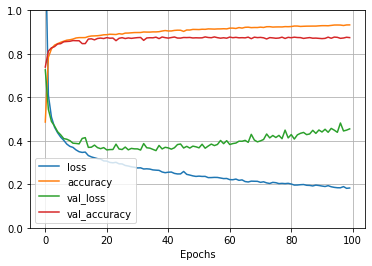

In [14]:
pd.DataFrame(hist.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')

# Step 3

In [15]:
K.clear_session()

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
callback = EarlyStopping(monitor='val_loss', patience=3)

In [18]:
hist_EarlyStopping = model.fit(X_train,ytrain, batch_size=500, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 1s 11ms/step - loss: 0.1816 - accuracy: 0.9328 - val_loss: 0.4582 - val_accuracy: 0.8728
Epoch 2/100
96/96 [==============================] - 1s 11ms/step - loss: 0.1823 - accuracy: 0.9326 - val_loss: 0.4628 - val_accuracy: 0.8717
Epoch 3/100
96/96 [==============================] - 2s 18ms/step - loss: 0.1777 - accuracy: 0.9353 - val_loss: 0.4652 - val_accuracy: 0.8708
Epoch 4/100
96/96 [==============================] - 1s 10ms/step - loss: 0.1887 - accuracy: 0.9302 - val_loss: 0.4609 - val_accuracy: 0.8743


##### It stops after 4 epochs

# Step 4

In [19]:
K.clear_session()

In [20]:
from tensorflow.keras.layers import BatchNormalization

In [21]:
model_Reg = Sequential()
model_Reg.add(Dense(units=25, activation='relu',input_shape=X_train[0].shape))
model_Reg.add(BatchNormalization())
model_Reg.add(Dense(units=25, activation='relu'))
model_Reg.add(BatchNormalization())
model_Reg.add(Dense(units=25, activation='relu'))
model_Reg.add(BatchNormalization())
model_Reg.add(Dense(units=25, activation='relu'))
model_Reg.add(BatchNormalization())
model_Reg.add(Dense(units=25, activation='relu'))
model_Reg.add(BatchNormalization())
model_Reg.add(Dense(units=10, activation='softmax'))

In [22]:
model_Reg.compile(
            optimizer='adam',
            loss= 'categorical_crossentropy',
            metrics=['accuracy']
)

In [23]:
hist_Reg = model_Reg.fit(X_train,ytrain, batch_size=500, epochs=100, verbose='auto', validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 6s 18ms/step - loss: 1.1893 - accuracy: 0.6318 - val_loss: 1.5344 - val_accuracy: 0.6394
Epoch 2/100
96/96 [==============================] - 1s 9ms/step - loss: 0.5778 - accuracy: 0.8051 - val_loss: 0.7716 - val_accuracy: 0.7859
Epoch 3/100
96/96 [==============================] - 1s 12ms/step - loss: 0.4660 - accuracy: 0.8401 - val_loss: 0.4924 - val_accuracy: 0.8349
Epoch 4/100
96/96 [==============================] - 2s 16ms/step - loss: 0.4137 - accuracy: 0.8567 - val_loss: 0.4360 - val_accuracy: 0.8494
Epoch 5/100
96/96 [==============================] - 1s 15ms/step - loss: 0.3871 - accuracy: 0.8662 - val_loss: 0.4115 - val_accuracy: 0.8529
Epoch 6/100
96/96 [==============================] - 1s 15ms/step - loss: 0.3710 - accuracy: 0.8700 - val_loss: 0.4306 - val_accuracy: 0.8487
Epoch 7/100
96/96 [==============================] - 1s 15ms/step - loss: 0.3555 - accuracy: 0.8737 - val_loss: 0.3973 - val_accuracy: 0.8585
Epoch 8

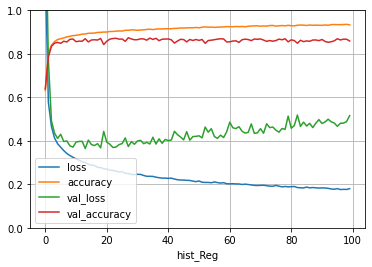

In [24]:
pd.DataFrame(hist_Reg.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('hist_Reg')
plt.show()

# Step 5

In [25]:
K.clear_session()

In [26]:
from tensorflow.keras.layers import Dropout

In [27]:
model_Reg_Dr = Sequential()
model_Reg_Dr.add(Dense(units=25, activation='relu',input_shape=X_train[0].shape))
model_Reg_Dr.add(Dropout(0.2))
model_Reg_Dr.add(Dense(units=25, activation='relu'))
model_Reg_Dr.add(Dropout(0.2))
model_Reg_Dr.add(Dense(units=25, activation='relu'))
model_Reg_Dr.add(Dropout(0.2))
model_Reg_Dr.add(Dense(units=25, activation='relu'))
model_Reg_Dr.add(Dropout(0.2))
model_Reg_Dr.add(Dense(units=25, activation='relu'))
model_Reg_Dr.add(Dropout(0.2))
model_Reg_Dr.add(Dense(units=10, activation='softmax'))

In [28]:
model_Reg_Dr.compile(
            optimizer='adam',
            loss= 'categorical_crossentropy',
            metrics=['accuracy']
)

In [29]:
hist_Reg_Dr = model_Reg_Dr.fit(X_train,ytrain, batch_size=500, epochs=100, verbose='auto', validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 2s 9ms/step - loss: 1.9297 - accuracy: 0.2924 - val_loss: 1.2382 - val_accuracy: 0.5748
Epoch 2/100
96/96 [==============================] - 1s 7ms/step - loss: 1.2052 - accuracy: 0.5604 - val_loss: 0.7711 - val_accuracy: 0.7016
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 0.9412 - accuracy: 0.6351 - val_loss: 0.6702 - val_accuracy: 0.7238
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 0.8369 - accuracy: 0.6698 - val_loss: 0.6319 - val_accuracy: 0.7327
Epoch 5/100
96/96 [==============================] - 1s 6ms/step - loss: 0.7883 - accuracy: 0.6891 - val_loss: 0.6128 - val_accuracy: 0.7388
Epoch 6/100
96/96 [==============================] - 1s 6ms/step - loss: 0.7536 - accuracy: 0.6989 - val_loss: 0.5994 - val_accuracy: 0.7433
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 0.7318 - accuracy: 0.7099 - val_loss: 0.5952 - val_accuracy: 0.7401
Epoch 8/100
9

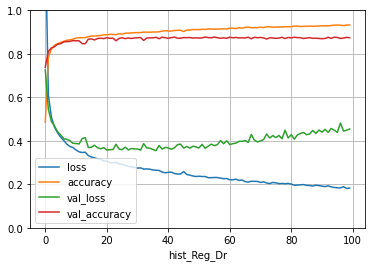

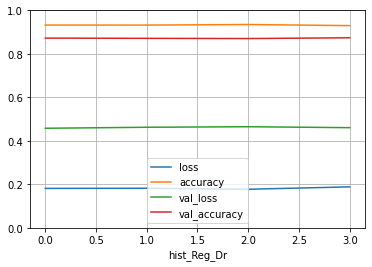

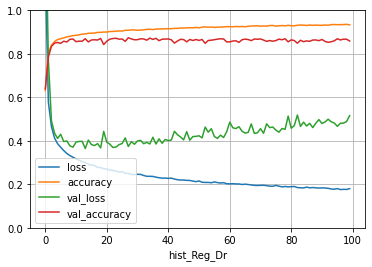

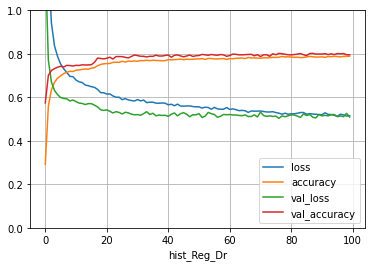

In [30]:
history_list = [hist, hist_EarlyStopping, hist_Reg, hist_Reg_Dr]
labels = ['hist', 'hist_EarlyStopping', 'hist_Reg', 'hist_Reg_Dr']
for i in history_list:
    pd.DataFrame(i.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    for j in labels:
        plt.xlabel(j)

In [31]:
model_Reg.save('/Users/Disalo/SPICED/euclidean_eukalyptus/payam_work/Week_09/imageclassifier/models/Solid_MNIST_Regularized with BatchNormalization_model.h5')

In [32]:
model_Reg_Dr.save('/Users/Disalo/SPICED/euclidean_eukalyptus/payam_work/Week_09/imageclassifier/models/Solid_MNIST_Regularized with Dropout_model.h5')